<a href="https://colab.research.google.com/github/yahafifi/AIPlatforms_Sections/blob/main/Medical_EDA_Workshop_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🩺 Medical Dataset — Comprehensive EDA

This notebook is designed for **teaching purposes**. It walks through a clean, structured Exploratory Data Analysis workflow on a medical dataset containing columns:
- `Age`, `Glucose`, `BMI`, `BloodPressure`, and `Outcome` (0 = No disease, 1 = Disease).

You will:
1. Load the dataset and inspect schema/summary
2. Audit missing values and outliers
3. Explore distributions and class balance
4. Examine relationships with the outcome
5. Check correlations
6. Apply a light preprocessing pass (simple imputation)
7. Export a cleaned version for modeling or dashboards

> Tip: Run cells step-by-step and encourage learners to interpret each plot and table.


In [ ]:

# ===============================
# 1) Setup & Imports
# ===============================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings (keep simple, teaching-friendly)
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.grid'] = True

# For reproducibility of random operations (if any)
np.random.seed(42)

print('Libraries imported.')


Libraries imported.


In [ ]:

# ===============================
# 2) Load Data
# ===============================

DATA_PATH = '/content/medical_dataset.csv'

df = pd.read_csv(DATA_PATH)
print('Loaded:', DATA_PATH)
print('Shape:', df.shape)
df.head()


Loaded: /content/medical_dataset.csv
Shape: (200, 5)


,Age,Glucose,BMI,BloodPressure,Outcome
0,58,150.573012,29.231447,131.790509,0
1,71,130.593327,32.681212,115.692899,0
2,48,117.326481,29.507134,114.380080,0
3,34,132.415760,32.303193,107.719845,0
4,62,94.741950,23.655126,110.621427,1



## Data Dictionary

| Column         | Type    | Description                                  |
|----------------|---------|----------------------------------------------|
| Age            | int     | Patient age (approximately 20–80).           |
| Glucose        | float   | Blood glucose level (with some outliers).    |
| BMI            | float   | Body Mass Index.                              |
| BloodPressure  | float   | Systolic blood pressure.                      |
| Outcome        | int     | 0 = No disease, 1 = Disease.                 |


In [ ]:

# ===============================
# 3) Quick Glance & Summary
# ===============================
print('\n--- Info ---')
df.info()

print('\n--- Descriptive Statistics ---')
display(df.describe(include='all'))



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    int64  
 1   Glucose        190 non-null    float64
 2   BMI            190 non-null    float64
 3   BloodPressure  200 non-null    float64
 4   Outcome        200 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 7.9 KB

--- Descriptive Statistics ---


,Age,Glucose,BMI,BloodPressure,Outcome
count,200.00000,190.000000,190.000000,200.000000,200.000000
mean,49.32500,112.121552,27.073541,121.032318,0.365000
std,17.39027,37.162886,5.432117,16.698017,0.482638
min,20.00000,5.000000,9.609154,81.406031,0.000000
25%,34.00000,93.152119,23.321012,110.108261,0.000000
50%,48.50000,108.836920,27.003216,122.127840,0.000000
75%,63.00000,125.872362,30.179660,131.480565,1.000000
max,79.00000,400.000000,43.269926,167.616632,1.000000


,missing_count,missing_pct
Glucose,10,5.0
BMI,10,5.0
Age,0,0.0
BloodPressure,0,0.0
Outcome,0,0.0


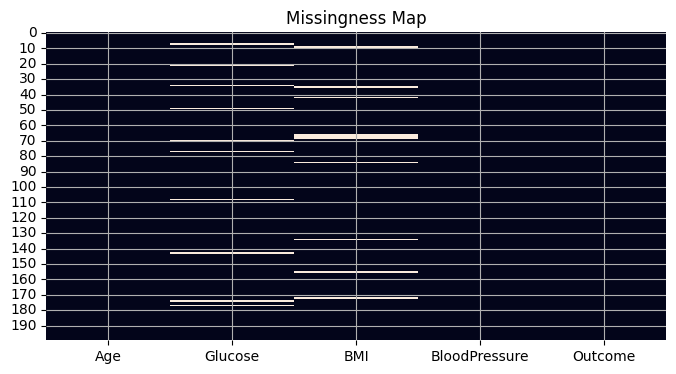

In [ ]:

# ===============================
# 4) Missing Values Audit
# ===============================
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
missing_table = pd.DataFrame({'missing_count': missing_count, 'missing_pct': missing_pct})
display(missing_table)

# Visualize missingness map
plt.figure()
sns.heatmap(df.isna(), cbar=False)
plt.title('Missingness Map')
plt.show()


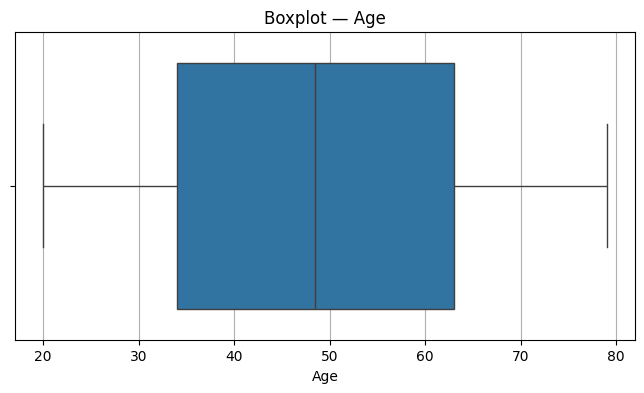

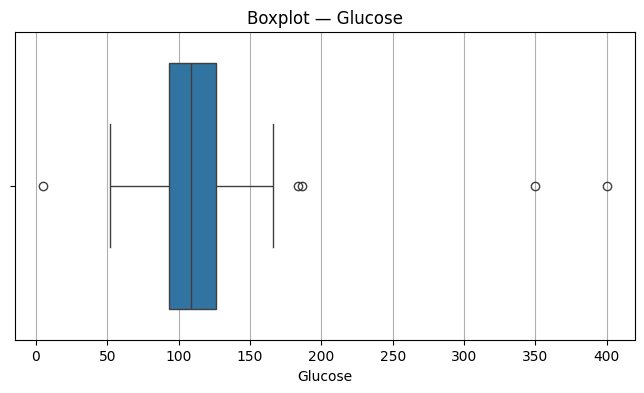

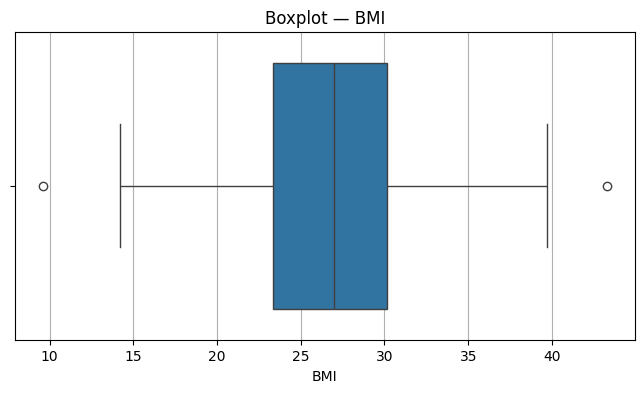

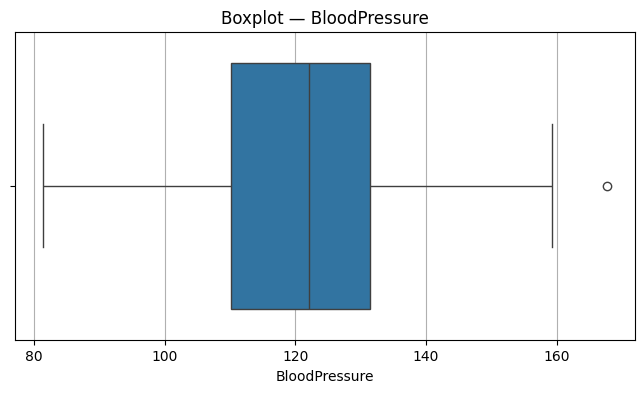

In [ ]:

# ===============================
# 5) Outlier Check (Boxplots)
# ===============================
numeric_cols = ['Age', 'Glucose', 'BMI', 'BloodPressure']

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot — {col}')
    plt.show()


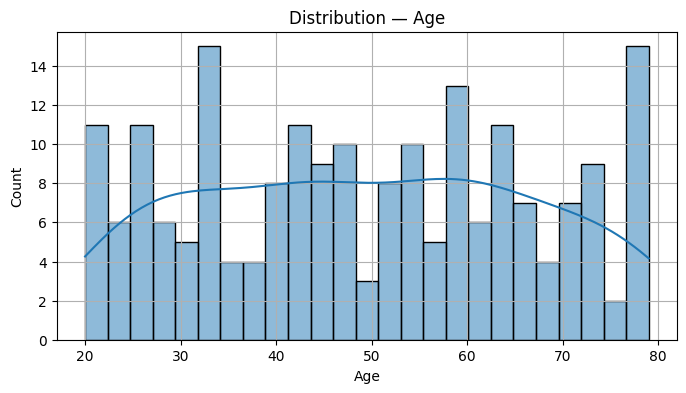

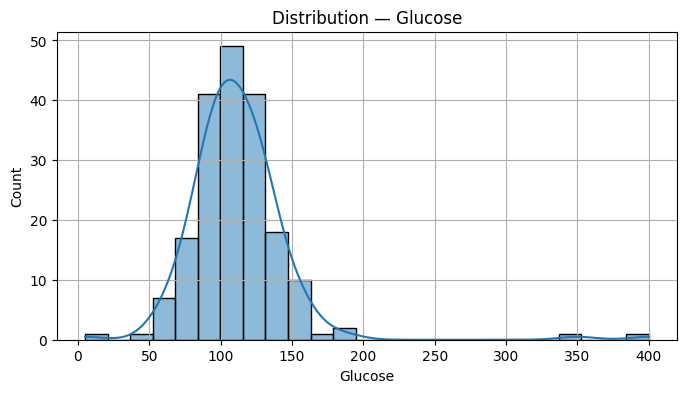

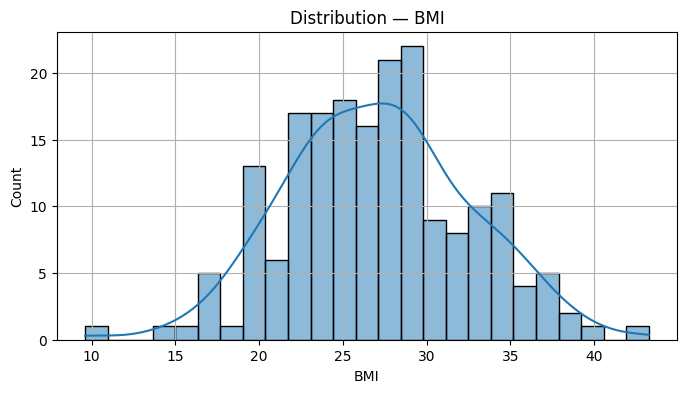

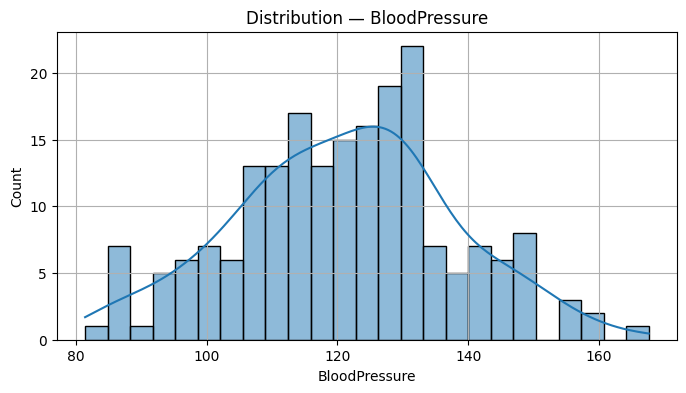

In [ ]:

# ===============================
# 6) Distributions
# ===============================
for col in ['Age', 'Glucose', 'BMI', 'BloodPressure']:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(f'Distribution — {col}')
    plt.show()


Counts by Outcome:
 Outcome
0    127
1     73
Name: count, dtype: int64

Percentage by Outcome (%):
 Outcome
0    63.5
1    36.5
Name: proportion, dtype: float64


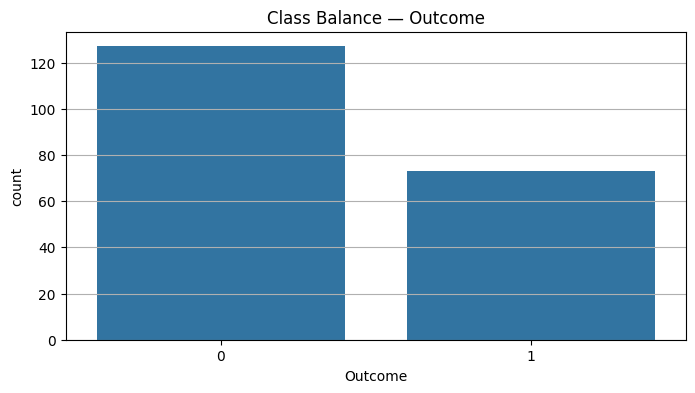

In [ ]:

# ===============================
# 7) Outcome Balance
# ===============================
outcome_counts = df['Outcome'].value_counts().sort_index()
outcome_ratio = (df['Outcome'].value_counts(normalize=True)*100).round(2).sort_index()

print('Counts by Outcome:\n', outcome_counts)
print('\nPercentage by Outcome (%):\n', outcome_ratio)

plt.figure()
sns.countplot(x='Outcome', data=df)
plt.title('Class Balance — Outcome')
plt.show()


In [ ]:

# ===============================
# 8) Grouped Summary by Outcome
# ===============================
group_means = df.groupby('Outcome')[['Age','Glucose','BMI','BloodPressure']].mean().round(2)
group_medians = df.groupby('Outcome')[['Age','Glucose','BMI','BloodPressure']].median().round(2)
print('Means by Outcome:')
display(group_means)
print('Medians by Outcome:')
display(group_medians)


Means by Outcome:


,Age,Glucose,BMI,BloodPressure
Outcome,,,,
0,48.68,112.94,26.83,119.90
1,50.45,110.75,27.48,122.99


Medians by Outcome:


,Age,Glucose,BMI,BloodPressure
Outcome,,,,
0,47.0,107.90,26.93,119.81
1,53.0,109.22,27.08,123.75


In [ ]:

# ===============================
# 9) Simple Effect Size (Cohen's d) between Outcome groups
# ===============================
def cohens_d(x0, x1):
    x0 = pd.Series(x0).dropna()
    x1 = pd.Series(x1).dropna()
    n0, n1 = len(x0), len(x1)
    s0, s1 = x0.std(ddof=1), x1.std(ddof=1)
    s_pooled = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2) / (n0+n1-2))
    return (x1.mean() - x0.mean()) / s_pooled

d_results = {}
for col in ['Age','Glucose','BMI','BloodPressure']:
    x0 = df.loc[df['Outcome']==0, col]
    x1 = df.loc[df['Outcome']==1, col]
    d_results[col] = round(cohens_d(x0, x1), 3)

effect_table = pd.DataFrame.from_dict(d_results, orient='index', columns=['cohens_d']).sort_values('cohens_d')
print('Cohen\'s d (Outcome=1 vs Outcome=0):')
display(effect_table)


Cohen's d (Outcome=1 vs Outcome=0):


,cohens_d
Glucose,-0.059
Age,0.102
BMI,0.120
BloodPressure,0.185


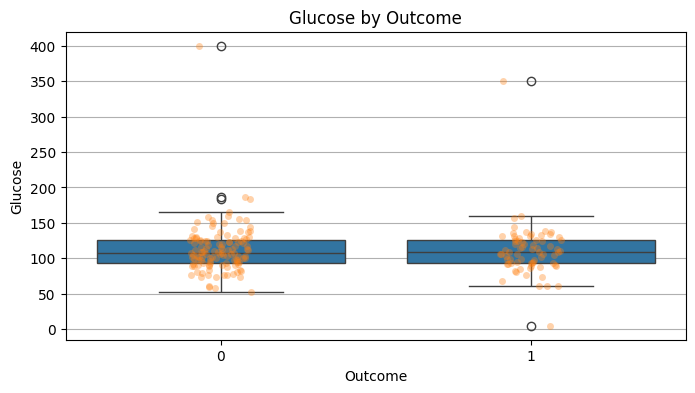

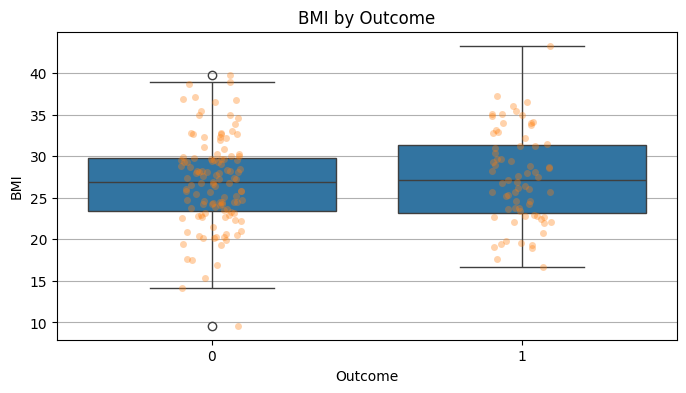

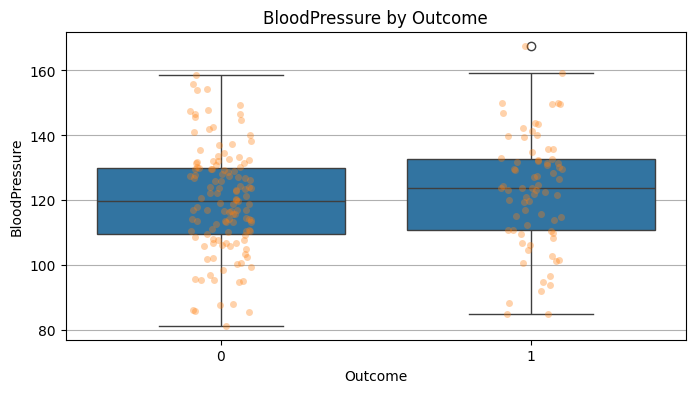

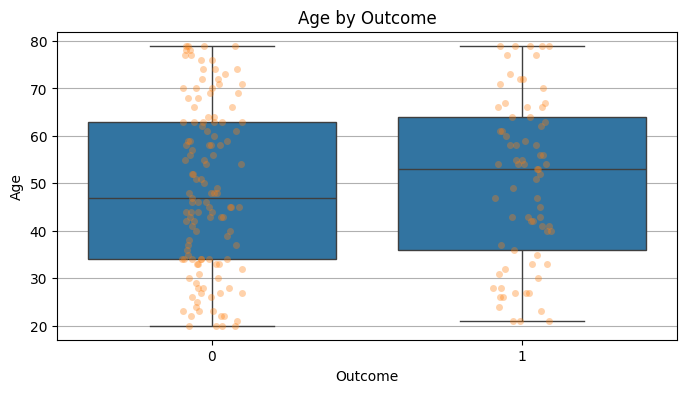

In [ ]:

# ===============================
# 10) Relationships vs Outcome
# ===============================
for col in ['Glucose', 'BMI', 'BloodPressure', 'Age']:
    plt.figure()
    sns.boxplot(data=df, x='Outcome', y=col)
    sns.stripplot(data=df, x='Outcome', y=col, alpha=0.35)
    plt.title(f'{col} by Outcome')
    plt.show()


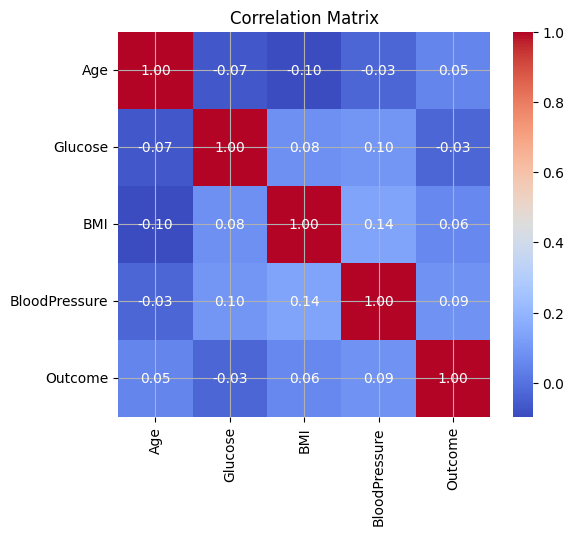

In [ ]:

# ===============================
# 11) Correlations
# ===============================
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



## ✅ Recap

- Audited **missing values** and **outliers**
- Explored **distributions** and **class balance**
- Compared features across **Outcome** groups
- Inspected **correlations** and **pairwise** relations
- Performed **light preprocessing** (median imputation + clipping)
- Exported a **cleaned CSV** for modeling or dashboards

> Next step: build **interactive visuals** with Plotly, and then integrate them into a **Dash** tab.
